In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

ROOT_DIR = os.path.abspath("../..")

sys.path.append(ROOT_DIR) 
from mrcnn import utils
import mrcnn.model as modellib
import visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/park/"))  
import total_seg
import total2_bbox
import importlib
importlib.reload(total_seg)
importlib.reload(total2_bbox)

importlib.reload(total2_bbox)
%matplotlib inline 


MODEL_DIR = os.path.join(ROOT_DIR, "logs")

SEG_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_seg_0100.h5")
BBOX_MODEL_PATH50 = os.path.join(ROOT_DIR, "mask_rcnn_bbox_0050.h5")
BBOX_MODEL_PATH98 = os.path.join(ROOT_DIR, "mask_rcnn_bbox_0098.h5")

# if not os.path.exists(SEG_MODEL_PATH):
#     utils.download_trained_weights(SEG_MODEL_PATH)

IMAGE_DIR = "/data/dataset/1_원천데이터/Test"

Using TensorFlow backend.


In [2]:
class SInferenceConfig(total_seg.ParkConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
class BInferenceConfig(total2_bbox.ParkConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

seg_config = SInferenceConfig()
seg_config.display()

bbox_config = BInferenceConfig()
bbox_config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
#모델 불러오기
seg_model = modellib.MaskRCNN(mode="inference", model_dir=SEG_MODEL_PATH, config=seg_config)
bbox_model50 = modellib.MaskRCNN(mode="inference", model_dir=BBOX_MODEL_PATH50, config=bbox_config)
bbox_model98 = modellib.MaskRCNN(mode="inference", model_dir=BBOX_MODEL_PATH65, config=bbox_config)
seg_model.load_weights(SEG_MODEL_PATH, by_name = True)
bbox_model50.load_weights(BBOX_MODEL_PATH50, by_name = True)
bbox_model98.load_weights(BBOX_MODEL_PATH65, by_name = True)
# model.load_weights(PARK_MODEL_PATH, by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


NameError: name 'BBOX_MODEL_PATH65' is not defined

In [ ]:
seg_class_names = ["BG", "Parking Space", "Driveable Space"]

bbox_class_names = ["BG", "Car", "Van", "Other Vehicle", "Motorbike", "Bicycle", "Electric Scooter", "Adult", "Child", "Stroller", "Shopping Cart", "Gate Arm", 
               "Parking Block", "Speed Bump", "Traffic Pole", "Traffic Cone", "Traffic Drum", "Traffic Barricade", "Cylindrical Bollard", "U-shaped Bollard", 
               "Other Road Barriers", "No Parking Stand", "Adjustable Parking Pole", "Waste Tire", "Planter Barrier", "Water Container", "Movable Obstacle", 
               "Barrier Gate", "Electric Car Charger", "Parking Meter", "Parking Sign", "Traffic Light", "Pedestrian Light", "Street Sign", "Disabled Parking Space", 
               "Pregnant Parking Space", "Electric Car Parking Space", "Two-wheeled Vehicle Parking Space", "Other Parking Space"]

class_names = ["BG", "Car", "Van", "Other Vehicle", "Motorbike", "Bicycle", "Electric Scooter", "Adult", "Child", "Stroller", "Shopping Cart", "Gate Arm", 
               "Parking Block", "Speed Bump", "Traffic Pole", "Traffic Cone", "Traffic Drum", "Traffic Barricade", "Cylindrical Bollard", "U-shaped Bollard", 
               "Other Road Barriers", "No Parking Stand", "Adjustable Parking Pole", "Waste Tire", "Planter Barrier", "Water Container", "Movable Obstacle", 
               "Barrier Gate", "Electric Car Charger", "Parking Meter", "Parking Sign", "Traffic Light", "Pedestrian Light", "Street Sign", "Disabled Parking Space", 
               "Pregnant Parking Space", "Electric Car Parking Space", "Two-wheeled Vehicle Parking Space", "Other Parking Space", "Parking Space", "Driveable Space"]
# print (len(class_names))

Processing 1 images
image                    shape: (1080, 1920, 3)       min:   16.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 51)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


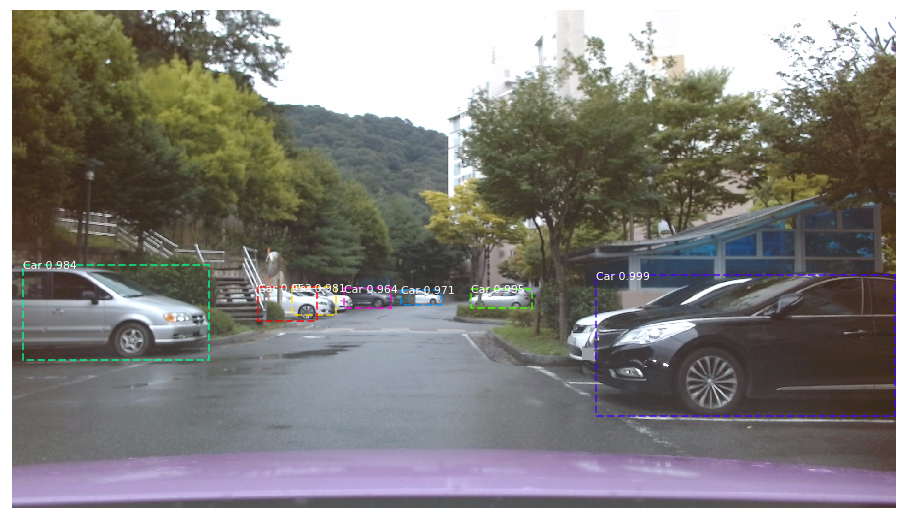

In [5]:
# BBOX 모델 50

import glob
file_names = glob.glob(f'{IMAGE_DIR}/*/*/*/Camera/*.jpg')
image = skimage.io.imread(random.choice(file_names))

results = bbox_model50.detect([image], verbose=1)
    
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            bbox_class_names, r['scores'])

In [4]:
# BBOX 모델 98

import glob
file_names = glob.glob(f'{IMAGE_DIR}/*/*/*/Camera/*.jpg')
image = skimage.io.imread(random.choice(file_names))

results = bbox_model98.detect([image], verbose=1)
    
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            bbox_class_names, r['scores'])

NameError: name 'bbox_model98' is not defined

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[2 1]


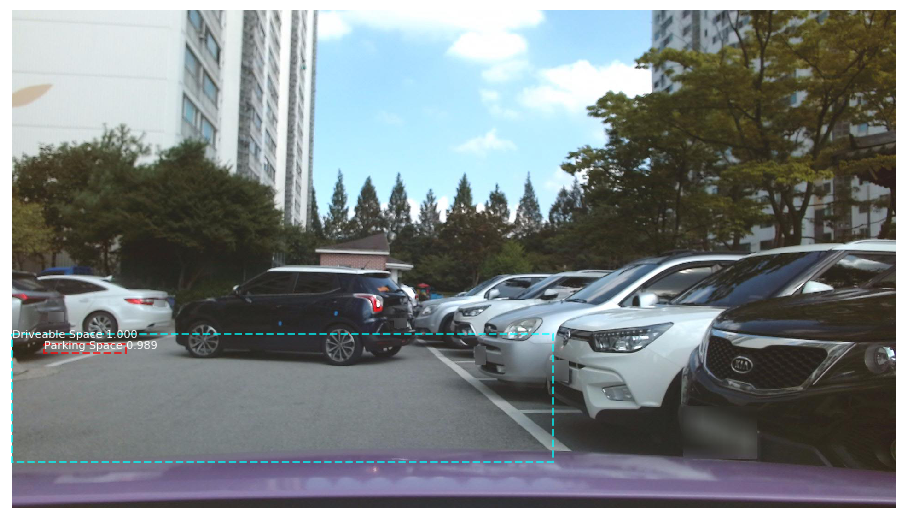

In [7]:
# SEG 모델

import glob
file_names = glob.glob(f'{IMAGE_DIR}/*/*/*/Camera/*.jpg')
image = skimage.io.imread(random.choice(file_names))

results = seg_model.detect([image], verbose=1)
    
r = results[0]
print( r['class_ids'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            seg_class_names, r['scores'])

In [7]:
seg_data_path = '/data/DatasetSeg_Final'


# SEG 모델 Load Validation Dataset
seg_dataset = total_seg.ParkDataset()
seg_dataset.load_park(seg_data_path, "Test")
seg_dataset.prepare()
print("seg_dataset Images: {}\nClasses: {}".format(len(seg_dataset.image_ids), seg_dataset.class_names))

/data/DatasetSeg_Final/라벨링데이터_Test
/data/DatasetSeg_Final/원천데이터_Test
seg_dataset Images: 15000
Classes: ['BG', 'Parking Space', 'Driveable Space']


In [5]:
name_dict_bbox ={
                1 : "Car" ,
                2 : "Van" ,
                3 : "Other Vehicle" , 
                4 : "Motorbike" ,
                5 : "Bicycle",
                6 : "Electric Scooter",
                7 : "Adult",
                8 : "Child",
                9 : "Stroller",
                10 : "Shopping Cart" ,
                11 : "Gate Arm",
                12 : "Parking Block",
                13 : "Speed Bump",
                14 : "Traffic Pole",
                15 : "Traffic Cone",
                16 : "Traffic Drum",
                17 : "Traffic Barricade",
                18 : "Cylindrical Bollard",
                19 : "U-shaped Bollard",
                20 : "Other Road Barriers",
                21 : "No Parking Stand", 
                22 : "Adjustable Parking Pole",
                23 : "Waste Tire",
                24 : "Planter Barrier",
                25 : "Water Container",
                26 : "Movable Obstacle",
                27 : "Barrier Gate",
                28 : "Electric Car Charger",
                29 : "Parking Meter",
                30 : "Parking Sign",
                31 : "Traffic Light",
                32 : "Pedestrian Light",
                33 : "Street Sign",
                34 : "Disabled Parking Space",
                35 : "Pregnant Parking Space",
                36 : "Electric Car Parking Space",
                37 : "Two-wheeled Vehicle Parking Space",
                38 : "Other Parking Space" ,
                }
name_dict_seg ={
                1 : "Parking Space",
                2 : "Driveable Space"
                }

In [19]:
def d_compute_matches_seg(gt_boxes, gt_class_ids, gt_masks,
                    pred_boxes, pred_class_ids, pred_scores, pred_masks,
                    iou_threshold=0.5, score_threshold=0.0):
    """Finds matches between prediction and ground truth instances.

    Returns:
        gt_match: 1-D array. For each GT box it has the index of the matched
                  predicted box.
        pred_match: 1-D array. For each predicted box, it has the index of
                    the matched ground truth box.
        overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """
    # Trim zero padding
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes = utils.trim_zeros(gt_boxes)
    gt_masks = gt_masks[..., :gt_boxes.shape[0]]
    pred_boxes = utils.trim_zeros(pred_boxes)
    pred_scores = pred_scores[:pred_boxes.shape[0]]
    # Sort predictions by score from high to low
    indices = np.argsort(pred_scores)[::-1]
    pred_boxes = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores = pred_scores[indices]
    pred_masks = pred_masks[..., indices]

    # Compute IoU overlaps [pred_masks, gt_masks]
    overlaps = utils.compute_overlaps_masks(pred_masks,gt_masks)

    # Loop through predictions and find matching ground truth boxes
    match_count = 0
    pred_match = -1 * np.ones([pred_boxes.shape[0]])
    gt_match = -1 * np.ones([gt_boxes.shape[0]])

    # print("(compute_matches) overlaps : ",overlaps)

    # print("(compute_matches) pred_class_ids : ",pred_class_ids)
    # print("(compute_matches) gt_class_ids : ",gt_class_ids)

    comp = []

    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        # 1. Sort matches by score
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        # print("(compute_matches) sorted_ixs : ",sorted_ixs)
        # 2. Remove low scores
        low_score_idx = np.where(overlaps[i, sorted_ixs] < score_threshold)[0]
        if low_score_idx.size > 0:
            sorted_ixs = sorted_ixs[:low_score_idx[0]]
        # 3. Find the match
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] > -1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            # print('(compute_matches) **gt_class_ids1 : ',gt_class_ids[j])
            # print('(compute_matches) **pred_class_ids1 : ',pred_class_ids[i])
            # print('(compute_matches) **pred_scores : ',pred_scores[i])
            # print('(compute_matches) **iou : ',iou)

            if iou < iou_threshold:
                break

            # print('(compute_matches) **gt_class_ids2 : ',gt_class_ids[j])
            # print('(compute_matches) **pred_class_ids2 : ',pred_class_ids[i])
            # print('(compute_matches) **iou : ',iou)

            comp.append([gt_class_ids[j],pred_class_ids[i],iou,pred_scores[i]])
            
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count += 1
                gt_match[j] = i
                pred_match[i] = j
                break
    # print('(compute_matches) gt_match2',gt_match)
    # print('(compute_matches) pred_match2',pred_match)

    for i,gt_m in enumerate(gt_match) :
        if gt_m == -1 :
            # print('(compute_matches) **gt_class_ids2 : ',gt_class_ids[i])
            comp.append([gt_class_ids[i]])


    return gt_match, pred_match, overlaps,comp


def d_compute_ap_seg(gt_boxes, gt_class_ids, gt_masks,
               pred_boxes, pred_class_ids, pred_scores, pred_masks,
               iou_threshold=0.5):
    """Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP: Mean Average Precision
    precisions: List of precisions at different class score thresholds.
    recalls: List of recall values at different class score thresholds.
    overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """
    # Get matches and overlaps
    gt_match, pred_match, overlaps,comp = d_compute_matches_seg(
        gt_boxes, gt_class_ids, gt_masks,
        pred_boxes, pred_class_ids, pred_scores, pred_masks,
        iou_threshold)

    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match > -1) / (np.arange(len(pred_match)) + 1)
    recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)

    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls = np.concatenate([[0], recalls, [1]])

    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])

    # Compute mean AP over recall range
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP = np.sum((recalls[indices] - recalls[indices - 1]) *
                 precisions[indices])

    return mAP, precisions, recalls, overlaps,comp


In [20]:
#SEG모델
import csv

image_ids = seg_dataset.image_ids
APs = []

with open('listiou_seg.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    for image_id in image_ids:
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(seg_dataset, seg_config,
                                   image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, seg_config), 0)
        results = seg_model.detect([image], verbose=0)
        r = results[0]
        data_name = [seg_dataset.image_reference(image_id)]

        AP, precisions, recalls, overlaps,comp =\
            d_compute_ap_seg(gt_bbox, gt_class_id, gt_mask,
                             r["rois"], r["class_ids"], r["scores"], r['masks'])
        for c in comp :
            c[0] = name_dict_seg[c[0]]
            if len(c) >2:
              c[1] = name_dict_seg[c[1]]
            comp_n = data_name + c
            writer.writerow(comp_n) 
        APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.8344474475487027


In [6]:
bbox_data_path = '/data/Dataset2d_Final'

# BBOX 모델 Load Validation Dataset
bbox_dataset = total2_bbox.ParkDataset()
bbox_dataset.load_park(bbox_data_path, "Test")
bbox_dataset.prepare()
print("bbox_dataset Images: {}\nClasses: {}".format(len(bbox_dataset.image_ids), bbox_dataset.class_names))

bbox_dataset Images: 49281
Classes: ['BG', 'Car', 'Van', 'Other Vehicle', 'Motorbike', 'Bicycle', 'Electric Scooter', 'Adult', 'Child', 'Stroller', 'Shopping Cart', 'Gate Arm', 'Parking Block', 'Speed Bump', 'Traffic Pole', 'Traffic Cone', 'Traffic Drum', 'Traffic Barricade', 'Cylindrical Bollard', 'U-shaped Bollard', 'Other Road Barriers', 'No Parking Stand', 'Adjustable Parking Pole', 'Waste Tire', 'Planter Barrier', 'Water Container', 'Movable Obstacle', 'Barrier Gate', 'Electric Car Charger', 'Parking Meter', 'Parking Sign', 'Traffic Light', 'Pedestrian Light', 'Street Sign', 'Disabled Parking Space', 'Pregnant Parking Space', 'Electric Car Parking Space', 'Two-wheeled Vehicle Parking Space', 'Other Parking Space']


In [7]:
def d_compute_matches(gt_boxes, gt_class_ids, gt_masks,
                    pred_boxes, pred_class_ids, pred_scores, pred_masks,
                    iou_threshold=0.1, score_threshold=0.0):
    """Finds matches between prediction and ground truth instances.

    Returns:
        gt_match: 1-D array. For each GT box it has the index of the matched
                  predicted box.
        pred_match: 1-D array. For each predicted box, it has the index of
                    the matched ground truth box.
        overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """
    # Trim zero padding
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes = utils.trim_zeros(gt_boxes)
    gt_masks = gt_masks[..., :gt_boxes.shape[0]]
    pred_boxes = utils.trim_zeros(pred_boxes)
    pred_scores = pred_scores[:pred_boxes.shape[0]]
    # Sort predictions by score from high to low
    indices = np.argsort(pred_scores)[::-1]
    pred_boxes = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores = pred_scores[indices]
    pred_masks = pred_masks[..., indices]

    # Compute IoU overlaps [pred_masks, gt_masks]
    overlaps = utils.compute_overlaps(pred_boxes,gt_boxes)

    # Loop through predictions and find matching ground truth boxes
    match_count = 0
    pred_match = -1 * np.ones([pred_boxes.shape[0]])
    gt_match = -1 * np.ones([gt_boxes.shape[0]])

    comp = []

    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        # 1. Sort matches by score
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        # print("(compute_matches) sorted_ixs : ",sorted_ixs)
        # 2. Remove low scores
        low_score_idx = np.where(overlaps[i, sorted_ixs] < score_threshold)[0]
        if low_score_idx.size > 0:
            sorted_ixs = sorted_ixs[:low_score_idx[0]]
        # 3. Find the match
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] > -1:
                continue
            iou = overlaps[i, j]

            if iou < iou_threshold:
                break

            comp.append([gt_class_ids[j],pred_class_ids[i],iou,pred_scores[i]])
            
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count += 1
                gt_match[j] = i
                pred_match[i] = j
                break
    # print('(compute_matches) gt_match2',gt_match)
    # print('(compute_matches) pred_match2',pred_match)

    for i,gt_m in enumerate(gt_match) :
        if gt_m == -1 :
            # print('(compute_matches) **gt_class_ids2 : ',gt_class_ids[i])
            comp.append([gt_class_ids[i]])


    return gt_match, pred_match, overlaps,comp


def d_compute_ap(gt_boxes, gt_class_ids, gt_masks,
               pred_boxes, pred_class_ids, pred_scores, pred_masks,
               iou_threshold=0.1):
    """Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP: Mean Average Precision
    precisions: List of precisions at different class score thresholds.
    recalls: List of recall values at different class score thresholds.
    overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """
    # Get matches and overlaps
    gt_match, pred_match, overlaps,comp = d_compute_matches(
        gt_boxes, gt_class_ids, gt_masks,
        pred_boxes, pred_class_ids, pred_scores, pred_masks,
        iou_threshold)

    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match > -1) / (np.arange(len(pred_match)) + 1)
    recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)

    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls = np.concatenate([[0], recalls, [1]])

    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])

    # Compute mean AP over recall range
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP = np.sum((recalls[indices] - recalls[indices - 1]) *
                 precisions[indices])

    return mAP, precisions, recalls, overlaps,comp


In [11]:
 #BBOX모델 50
import csv

image_ids = bbox_dataset.image_ids
APs = []

with open('listiou_bbox50.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    for image_id in image_ids:
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(bbox_dataset, bbox_config,
                                   image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, bbox_config), 0)
        results = bbox_model50.detect([image], verbose=0)
        r = results[0]
        data_name = [bbox_dataset.image_reference(image_id)]

        AP, precisions, recalls, overlaps,comp =\
            d_compute_ap(gt_bbox, gt_class_id, gt_mask,
                             r["rois"], r["class_ids"], r["scores"], r['masks'])
        for c in comp :
            c[0] = name_dict_bbox[c[0]]
            if len(c) >2:
              c[1] = name_dict_bbox[c[1]]
            comp_n = data_name + c
            writer.writerow(comp_n) 
        APs.append(AP)
print("mAP @ IoU=50: ", np.mean(APs))

mAP @ IoU=50:  0.5774302319538653


In [ ]:
#BBOX모델 98
import csv

image_ids = bbox_dataset.image_ids
APs = []

with open('listiou_bbox98.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    for image_id in image_ids:
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(bbox_dataset, bbox_config,
                                   image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, bbox_config), 0)
        results = bbox_model50.detect([image], verbose=0)
        r = results[0]
        data_name = [bbox_dataset.image_reference(image_id)]

        AP, precisions, recalls, overlaps,comp =\
            d_compute_ap(gt_bbox, gt_class_id, gt_mask,
                             r["rois"], r["class_ids"], r["scores"], r['masks'])
        for c in comp :
            c[0] = name_dict_bbox[c[0]]
            if len(c) >2:
                c[1] = name_dict_bbox[c[1]]
            comp_n = data_name + c
            writer.writerow(comp_n) 
        APs.append(AP)
print("mAP @ IoU=50: ", np.mean(APs))